In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv

# # Path: pymdna/__init__.py, prototype of the package and atomic is not properly referenced in the package at genertors.py now I just explicitly define the path loction
# import pymdna as mdna
import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

joblib is not installed. Falling back to sequential computation.


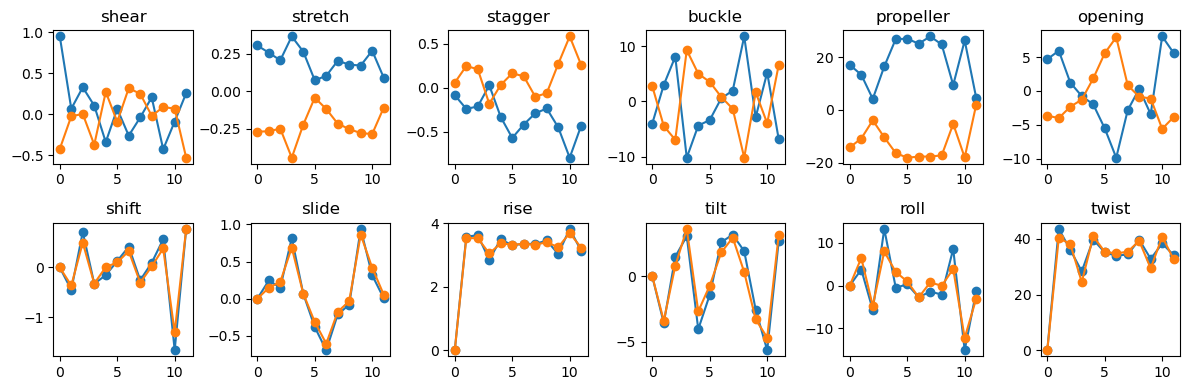

In [2]:
pdb = md.load_pdb('./1bna.pdb')
nuc = mdna.NucleicFrames(pdb)

params, names = nuc.get_parameters()

ref = data = np.array([np.genfromtxt('./1bna_x3dna.dat', skip_header=2, usecols=range(1, 13))])

fig,ax = plt.subplots(2,6, figsize=[12,4])
ax = ax.flatten()
for _,name in enumerate(names):
    

    para = params[:,:,names.index(name)]
    ref_para = ref[:,:,names.index(name)]

    ax[_].plot(np.mean(para, axis=0),'-o')    
    
    ax[_].plot(np.mean(ref_para, axis=0),'-o')
    ax[_].set_title(name)
    
fig.tight_layout()


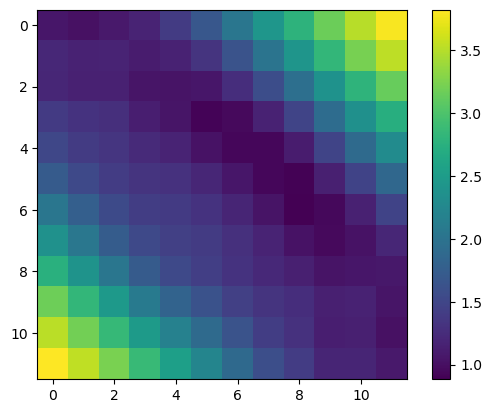

In [3]:
def compute_res_mass(residues):
    return np.array([ md.compute_center_of_mass(pdb.atom_slice([at.index  for at in res.atoms]))[0] for res in residues])

res_A_coms = compute_res_mass(nuc.res_A)
res_B_coms = compute_res_mass(nuc.res_B)
pair_coms = np.array([np.linalg.norm(res_A_coms - res_B_coms[i], axis=1) for i in range(res_B_coms.shape[0])])
plt.imshow(pair_coms, cmap='viridis')   
plt.colorbar()

In [4]:
res = nuc.res_A[-1]
sub_res = selection = [at.index  for at in res.atoms]
view = nv.show_mdtraj(pdb)
view.add_representation('ball+stick', selection=sub_res)    
view  

NGLWidget()

# Base Reference Frames
For each base plot reference frame

(-1.2542353739341099,
 4.30733533402284,
 -0.6694352944691975,
 4.892135413487752,
 -1.3296990036964416,
 2.8414790272712707)

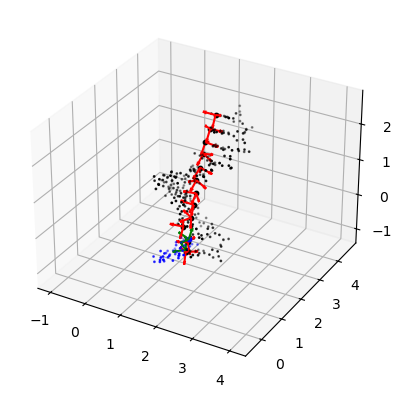

In [5]:
def get_frame(pdb, res):
    res_traj = pdb.atom_slice([at.index for at in res.atoms]) 
    ref_base = mdna.ReferenceBase(res_traj)
    return  np.array([ref_base.b_R, ref_base.b_L, ref_base.b_D, ref_base.b_N]).swapaxes(0,1)

def plot_frame_and_res(pdb, res, ax, color='k',color_vec='r'):

    xyz = pdb.atom_slice([at.index for at in res.atoms]).xyz[0]
    frame = get_frame(pdb, res)[0]

    ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c=color, marker='o', s=1)
    ax.scatter(frame[0][0], frame[0][1], frame[0][2], c=color, marker='o', s=10)
    # quivers
    ax.quiver(frame[0][0], frame[0][1], frame[0][2], frame[1][0], frame[1][1], frame[1][2], color=color_vec,length=0.34)
    ax.quiver(frame[0][0], frame[0][1], frame[0][2], frame[2][0], frame[2][1], frame[2][2], color=color_vec,length=0.34)
    ax.quiver(frame[0][0], frame[0][1], frame[0][2], frame[3][0], frame[3][1], frame[3][2], color=color_vec,length=0.34)


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

for res in nuc.res_A:
    plot_frame_and_res(pdb, res, ax)

for res in nuc.res_B[-2:]:
    plot_frame_and_res(pdb, res, ax, color='b', color_vec='g')

ax.axis('equal')

(0.7328599035739898,
 2.7654400527477265,
 1.479309970140457,
 3.511890119314194,
 1.9243324652314184,
 3.448767577111721)

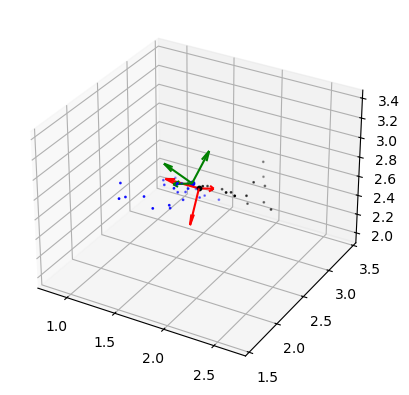

In [6]:
nuc = mdna.NucleicFrames(pdb)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

plot_frame_and_res(pdb, nuc.res_A[0], ax)

plot_frame_and_res(pdb, nuc.res_B[0], ax, color='b', color_vec='g')

ax.axis('equal')

# Mean reference frames 
Plot the frames on each base pair

(-1.5890167663494745,
 4.642116726438204,
 -1.0042166868845621,
 5.226916805903117,
 -1.3525250077247621,
 3.3208251118659975)

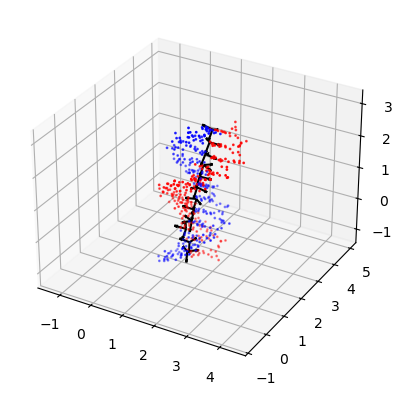

In [7]:
frames = np.squeeze(nuc.mean_reference_frames) # raw data has shape (12, 1, 4, 3)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

for frame in frames:
    ax.quiver(frame[0][0], frame[0][1], frame[0][2], frame[1][0], frame[1][1], frame[1][2], color='k',length=0.34)
    ax.quiver(frame[0][0], frame[0][1], frame[0][2], frame[2][0], frame[2][1], frame[2][2], color='k',length=0.34)
    ax.quiver(frame[0][0], frame[0][1], frame[0][2], frame[3][0], frame[3][1], frame[3][2], color='k',length=0.34)

xyz = pdb.xyz[0]
xyz_a = pdb.atom_slice(pdb.top.select('chainid 0')).xyz[0]
xyz_b = pdb.atom_slice(pdb.top.select('chainid 1')).xyz[0]

ax.scatter(xyz_a[:,0], xyz_a[:,1], xyz_a[:,2], c='r', marker='o', s=1)
ax.scatter(xyz_b[:,0], xyz_b[:,1], xyz_b[:,2], c='b', marker='o', s=1)

ax.axis('equal')